### Regression of pH

In [1]:
from tpot import TPOTRegressor
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import seaborn as sns
import numpy as np
import datetime

In [2]:
# data
acidoCEST_ML = pd.read_csv('acido_CEST_MRI_MegaBox_01_to_08_clean.csv')
acidoCEST_ML = acidoCEST_ML.drop(['Unnamed: 0','ApproT1(sec)','Temp','FILE','Conc(mM)'], axis = 1)
print(acidoCEST_ML.shape)

(36000, 89)


In [35]:
acidoCEST_ML.shape

(36000, 89)

In [3]:
acidoCEST_ML

,pH,ExpT1(ms),ExpT2(ms),ExpB1(percent),ExpB0(ppm),ExpB0(Hz),SatPower(uT),SatTime(ms),-12,-11,...,7,7.2,7.4,7.6,7.8,8,9,10,11,12
0,6.24,402.70,201.72,118.130,0.58603,176.000,3.0,2000,0.994178,0.983831,...,0.971111,0.980716,0.979566,0.979752,0.984350,0.984906,0.984795,0.984350,0.984981,0.988652
1,6.38,388.31,214.49,107.810,0.70919,212.990,3.0,2000,0.992924,0.985348,...,0.980465,0.974735,0.983810,0.980580,0.989117,0.976427,0.985118,0.992963,0.982541,0.986118
2,6.58,393.20,217.77,103.080,0.76500,229.760,3.0,2000,0.994844,0.993349,...,0.990908,0.993978,0.986067,0.977566,0.994293,0.991026,0.993073,0.995671,0.995749,0.994293
3,6.69,389.14,217.87,106.210,0.63908,191.940,3.0,2000,0.983920,0.990491,...,0.977619,0.978972,0.969579,0.976034,0.980634,0.977116,0.982064,0.984422,0.980634,0.978856
4,6.84,379.38,214.10,111.260,0.33744,101.340,3.0,2000,0.998284,0.989862,...,0.979530,0.976333,0.986626,0.980583,0.986158,0.983624,0.992982,0.984248,0.985690,0.985417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,6.38,4112.50,601.83,101.610,0.22259,66.852,4.0,2000,0.993230,0.991712,...,0.957295,0.957801,0.955397,0.963685,0.965772,0.971340,0.970454,0.969379,0.977224,0.973871
35996,6.58,3918.70,575.72,109.390,0.33517,100.660,4.0,2000,0.979288,0.978693,...,0.940677,0.947761,0.947329,0.948518,0.962200,0.957766,0.959604,0.972637,0.972475,0.975827
35997,6.70,3911.10,593.31,106.630,0.40331,121.130,4.0,2000,0.994350,0.983577,...,0.938586,0.947827,0.960817,0.957015,0.945187,0.958494,0.969953,0.978560,0.972963,0.975022
35998,6.88,4043.40,632.75,99.980,0.35798,107.510,4.0,2000,0.988520,0.973213,...,0.949383,0.938830,0.944454,0.961153,0.959413,0.963356,0.961674,0.969676,0.977967,0.983243


In [4]:
# sample for development
#acidoCEST_ML = acidoCEST_ML.sample(n=2000)

## TPO training to get pipeline all features we can measure

In [5]:
%%time

X_train, X_test, y_train, y_test = train_test_split(  acidoCEST_ML.drop('pH',axis=1)
                                                    , acidoCEST_ML.pH 
                                                    , test_size=0.30, random_state=42)


tpot = TPOTRegressor(    generations= 10, population_size=10, verbosity=2, n_jobs= 4 , cv = 3
                        , early_stop=3
                        , max_time_mins= 30
                        , template = 'StandardScaler-Transformer-Selector-Regressor'
                        , scoring = metrics.make_scorer(metrics.median_absolute_error,greater_is_better=False) )

tpot.fit(X_train,y_train)

date_time = datetime.datetime.now().strftime("%m_%d_%Y_%H:%M")
tpot.export('acidoCEST_ML_tpot_pH_regressor_'+date_time+'.py')

print('Score on test set: \n',tpot.score(X_test, y_test))

Version 0.11.6.post1 of tpot is outdated. Version 0.11.6.post3 was released 1 day ago.



Generation 1 - Current best internal CV score: -0.1605425036786078

Generation 2 - Current best internal CV score: -0.1605425036786078

Generation 3 - Current best internal CV score: -0.08333333332559938

Generation 4 - Current best internal CV score: -0.08333333332559938

Generation 5 - Current best internal CV score: -0.08333333332559938

Generation 6 - Current best internal CV score: -0.02666666660595096

31.37 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingRegressor(VarianceThreshold(RobustScaler(StandardScaler(input_matrix)), threshold=0.05), alpha=0.99, learning_rate=1.0, loss=lad, max_depth=9, max_features=0.8500000000000001, min_samples_leaf=7, min_samples_split=9, n_estimators=100, subsample=1.0)
Score on test set: 
 -0.009999999999728892
CPU times: user 4min 17s, sys: 8.47 s, total: 4min 25s
Wall time: 34min 55s


In [6]:
sat_powers  = X_test['SatPower(uT)'].unique().tolist(); sat_powers.sort()

sat_times = X_test['SatTime(ms)'].unique().tolist(); sat_times.sort()

E = pd.DataFrame(data = np.zeros(  ( len(sat_times) , len(sat_powers) )  )
                 , columns=sat_powers
                 , index = sat_times )

for t in sat_times:
    for p in sat_powers:
        f = (X_test['SatPower(uT)'] == p) & (X_test['SatTime(ms)']== t)
        yhat = tpot.predict(X_test[f])
        error = metrics.mean_absolute_error(y_test[f], yhat)
        E.loc[t,p] = error

Text(0.5, 1, 'Median Absolure Error in pH regression using all data \n')

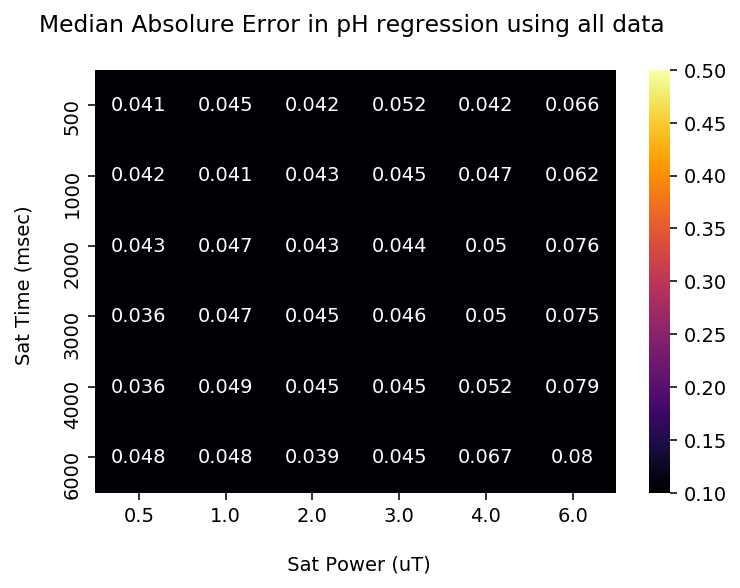

In [7]:
fig, ax = plt.subplots(dpi = 140)
sns.heatmap(E, cmap='inferno',ax = ax, vmin=.1, vmax=0.50,annot=True)
plt.xlabel('\n Sat Power (uT)')
plt.ylabel('Sat Time (msec) \n')
plt.title('Median Absolure Error in pH regression using all data \n')

## TPO training to get pipeline with `only` CEST data & `B1` and `B0`
- note: You cannot compare the results with the model using the entire data if the models are different

In [29]:
%%time

drop_cols = ['ExpT1(ms)', 'ExpT2(ms)','ExpB0(Hz)', 'SatPower(uT)', 'SatTime(ms)']


tpot2 = TPOTRegressor(    generations= 10, population_size=10, verbosity=2, n_jobs= 4 , cv = 3
                        , early_stop=3
                        , max_time_mins= 30
                        , template = 'StandardScaler-Transformer-Selector-Regressor'
                        , scoring = metrics.make_scorer(metrics.median_absolute_error,greater_is_better=False) )

tpot2.fit(X_train.drop(drop_cols,axis=1),y_train)

date_time = datetime.datetime.now().strftime("%m_%d_%Y_%H:%M")
tpot2.export('acidoCEST_ML_tpot_pH_regressor_CEST_only'+date_time+'.py')

print('Score on test set: \n',tpot2.score(X_test.drop(drop_cols,axis=1), y_test))

Version 0.11.6.post1 of tpot is outdated. Version 0.11.6.post3 was released 1 day ago.



Generation 1 - Current best internal CV score: -0.11981929462887238

Generation 2 - Current best internal CV score: -0.11679782691988046

Generation 3 - Current best internal CV score: -0.11679782691988046

Generation 4 - Current best internal CV score: -0.11679782691988046

Generation 5 - Current best internal CV score: -0.11610111258930544

32.59 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingRegressor(VarianceThreshold(MaxAbsScaler(StandardScaler(input_matrix)), threshold=0.005), alpha=0.95, learning_rate=0.5, loss=huber, max_depth=8, max_features=1.0, min_samples_leaf=6, min_samples_split=15, n_estimators=100, subsample=0.8500000000000001)
Score on test set: 
 -0.10462706687569012
CPU times: user 3min 25s, sys: 2.35 s, total: 3min 27s
Wall time: 35min 43s


Text(0.5, 1, 'Median Absolure Error in pH regression using only CEST data, B0, and B1 \n')

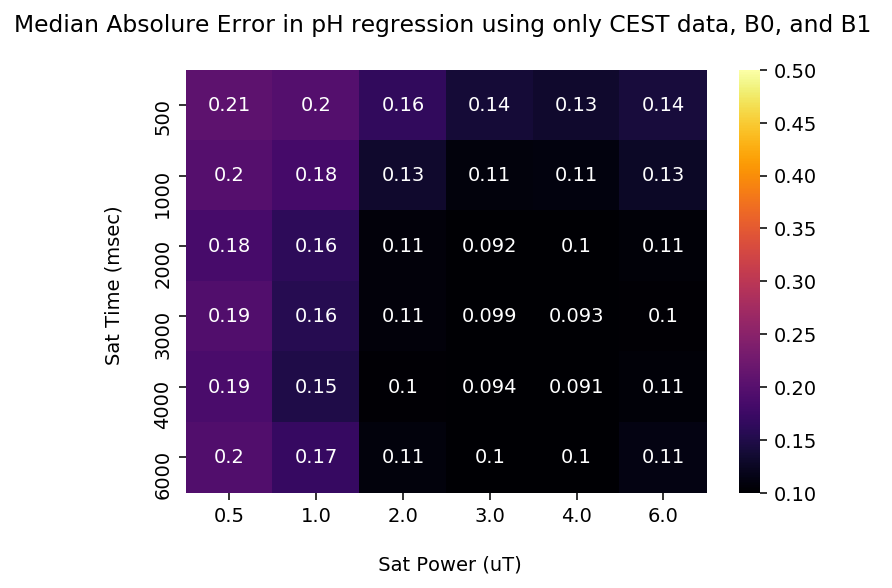

In [30]:
sat_powers  = X_test['SatPower(uT)'].unique().tolist(); sat_powers.sort()

sat_times = X_test['SatTime(ms)'].unique().tolist(); sat_times.sort()

E2 = pd.DataFrame(data = np.zeros(  ( len(sat_times) , len(sat_powers) )  )
                 , columns=sat_powers
                 , index = sat_times )
for t in sat_times:
    for p in sat_powers:
        f = (X_test['SatPower(uT)'] == p) & (X_test['SatTime(ms)']== t)
        yhat = tpot2.predict(X_test[f].drop(drop_cols,axis=1))
        error = metrics.mean_absolute_error(y_test[f], yhat)
        E2.loc[t,p] = error
        
fig, ax = plt.subplots(dpi = 140)
sns.heatmap(E2, cmap='inferno',ax = ax, vmin=.1, vmax=0.50,annot=True)
plt.xlabel('\n Sat Power (uT)')
plt.ylabel('Sat Time (msec) \n')
plt.title('Median Absolure Error in pH regression using only CEST data, B0, and B1 \n')

## TPO training to get pipeline with `only` CEST data & `T1` and `T2`
- note: You cannot compare the results with the model using the entire data if the models are different

In [31]:
%%time

drop_cols = ['ExpB1(percent)', 'ExpB0(ppm)', 'ExpB0(Hz)','SatPower(uT)', 'SatTime(ms)']


tpot3 = TPOTRegressor(    generations= 10, population_size=10, verbosity=2, n_jobs= 4 , cv = 3
                        , early_stop=3
                        , max_time_mins= 30
                        , template = 'StandardScaler-Transformer-Selector-Regressor'
                        , scoring = metrics.make_scorer(metrics.median_absolute_error,greater_is_better=False) )

tpot3.fit(X_train.drop(drop_cols,axis=1),y_train)

print('Score on test set: \n',tpot3.score(X_test.drop(drop_cols,axis=1), y_test))

Version 0.11.6.post1 of tpot is outdated. Version 0.11.6.post3 was released 1 day ago.



Generation 1 - Current best internal CV score: -0.17020702479375224

Generation 2 - Current best internal CV score: -0.17020702479375224

Generation 3 - Current best internal CV score: -0.17020702479375224

Generation 4 - Current best internal CV score: -0.16695754355472228

Generation 5 - Current best internal CV score: -0.16695754355472228

Generation 6 - Current best internal CV score: -0.16695754355472228

Generation 7 - Current best internal CV score: -0.16084794263614968

Generation 8 - Current best internal CV score: -0.13092624874724912

Generation 9 - Current best internal CV score: -0.13092624874724912

Generation 10 - Current best internal CV score: -0.12640243686444577

Best pipeline: GradientBoostingRegressor(VarianceThreshold(RobustScaler(StandardScaler(input_matrix)), threshold=0.005), alpha=0.85, learning_rate=0.5, loss=lad, max_depth=6, max_features=0.7000000000000001, min_samples_leaf=5, min_samples_split=13, n_estimators=100, subsample=0.7500000000000001)
Score on t

Text(0.5, 1, 'Median Absolure Error in pH regression using only CEST , T1, and  T2 data')

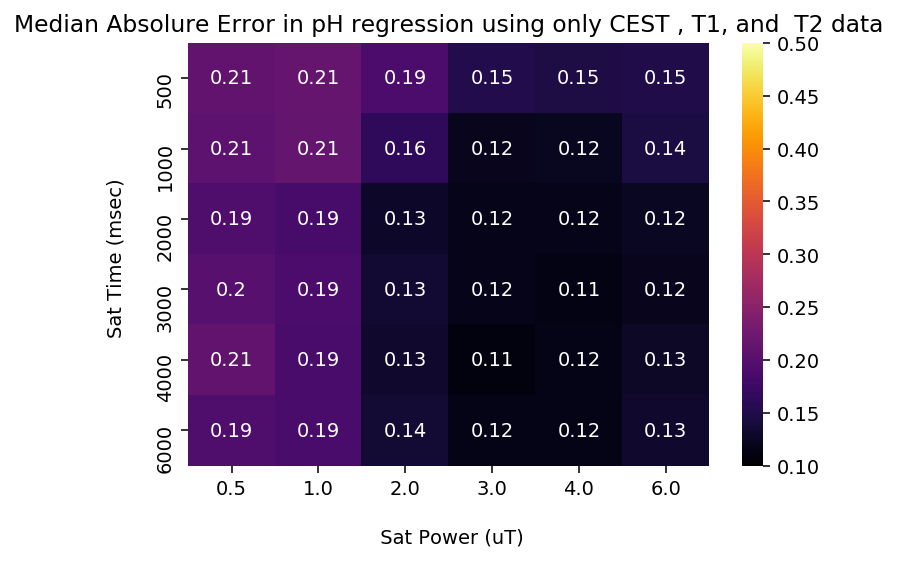

In [32]:
sat_powers  = X_test['SatPower(uT)'].unique().tolist(); sat_powers.sort()

sat_times = X_test['SatTime(ms)'].unique().tolist(); sat_times.sort()

E3 = pd.DataFrame(data = np.zeros(  ( len(sat_times) , len(sat_powers) )  )
                 , columns=sat_powers
                 , index = sat_times )
for t in sat_times:
    for p in sat_powers:
        f = (X_test['SatPower(uT)'] == p) & (X_test['SatTime(ms)']== t)
        yhat = tpot3.predict(X_test[f].drop(drop_cols,axis=1))
        error = metrics.mean_absolute_error(y_test[f], yhat)
        E3.loc[t,p] = error
        
fig, ax = plt.subplots(dpi = 140)
sns.heatmap(E3, cmap='inferno',ax = ax, vmin=.1, vmax=0.50,annot=True)
plt.xlabel('\n Sat Power (uT)')
plt.ylabel('Sat Time (msec) \n')
plt.title('Median Absolure Error in pH regression using only CEST , T1, and  T2 data')

## TPO training to get pipeline with `only` CEST data , `sat time`, and `sat power`
- note: You cannot compare the results with the model using the entire data if the models are different

In [33]:
%%time

drop_cols = ['ExpT1(ms)', 'ExpT2(ms)', 'ExpB1(percent)', 'ExpB0(ppm)', 'ExpB0(Hz)']


tpot4 = TPOTRegressor(    generations= 10, population_size=10, verbosity=2, n_jobs= 4 , cv = 3
                        , early_stop=3
                        , max_time_mins= 30
                        , template = 'StandardScaler-Transformer-Selector-Regressor'
                        , scoring = metrics.make_scorer(metrics.median_absolute_error,greater_is_better=False) )

tpot4.fit(X_train.drop(drop_cols,axis=1),y_train)

print('Score on test set: \n',tpot4.score(X_test.drop(drop_cols,axis=1), y_test))

Version 0.11.6.post1 of tpot is outdated. Version 0.11.6.post3 was released 1 day ago.



Generation 1 - Current best internal CV score: -0.1784039507558126

Generation 2 - Current best internal CV score: -0.1784039507558126

Generation 3 - Current best internal CV score: -0.16896109169679777

Generation 4 - Current best internal CV score: -0.15583333333333313

Generation 5 - Current best internal CV score: -0.15424879248007276

Generation 6 - Current best internal CV score: -0.15424879248007276

Generation 7 - Current best internal CV score: -0.15240602935854156

Generation 8 - Current best internal CV score: -0.14717021284271192

Generation 9 - Current best internal CV score: -0.14717021284271192

Generation 10 - Current best internal CV score: -0.14288700530521328

Best pipeline: KNeighborsRegressor(SelectPercentile(StandardScaler(StandardScaler(input_matrix)), percentile=75), n_neighbors=4, p=1, weights=distance)
Score on test set: 
 -0.1302208645771623
CPU times: user 29.4 s, sys: 2.85 s, total: 32.2 s
Wall time: 33min 26s


Text(0.5, 1, 'Median Absolure Error in pH regression using only CEST, sat time, and sat power')

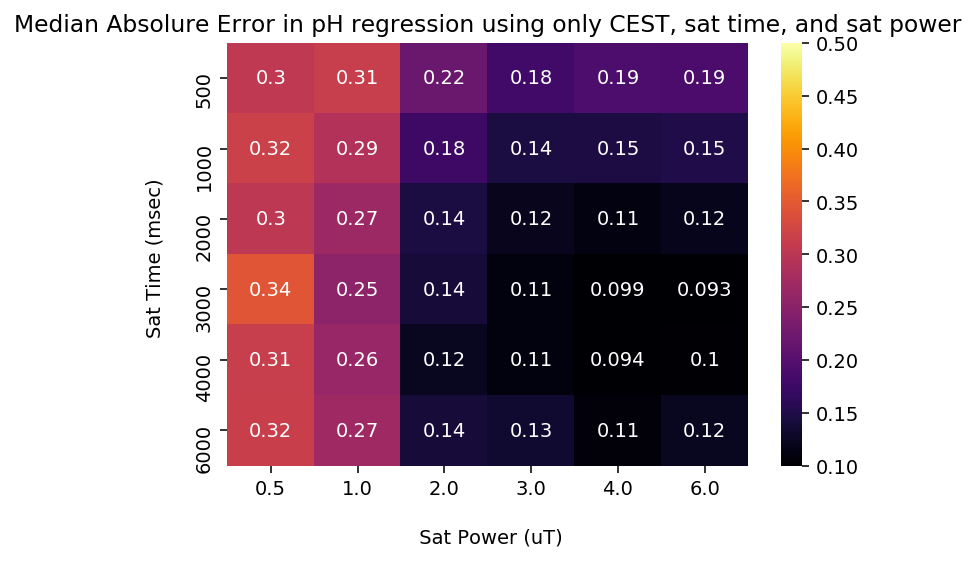

In [34]:
sat_powers  = X_test['SatPower(uT)'].unique().tolist(); sat_powers.sort()

sat_times = X_test['SatTime(ms)'].unique().tolist(); sat_times.sort()

E4 = pd.DataFrame(data = np.zeros(  ( len(sat_times) , len(sat_powers) )  )
                 , columns=sat_powers
                 , index = sat_times )
for t in sat_times:
    for p in sat_powers:
        f = (X_test['SatPower(uT)'] == p) & (X_test['SatTime(ms)']== t)
        yhat = tpot4.predict(X_test[f].drop(drop_cols,axis=1))
        error = metrics.mean_absolute_error(y_test[f], yhat)
        E4.loc[t,p] = error
        
fig, ax = plt.subplots(dpi = 140)
sns.heatmap(E4, cmap='inferno',ax = ax, vmin=.1, vmax=0.50,annot=True)
plt.xlabel('\n Sat Power (uT)')
plt.ylabel('Sat Time (msec) \n')
plt.title('Median Absolure Error in pH regression using only CEST, sat time, and sat power')